<a href="https://colab.research.google.com/github/mfernl/03MIAR_Algoritmos-de-optimizacion-2026/blob/main/Marco_Fernandez_Algoritmos_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Marco Fernández Llamas <br>
Link:   https://colab.research.google.com/drive/1SZsT4ICuLTd_GHmAcO59Vo7W5w6El9Gx?usp=sharing<br>
Github: https://github.com/mfernl/03MIAR_Algoritmos-de-optimizacion-2026.git
<br>


#Carga de librerias

In [79]:
!pip install requests
!pip install tabulate>=0.9 networkx>=3.0
!pip install tsplib95 --no-deps

In [80]:
!pip install deprecated

#Carga de los datos del problema

In [95]:

import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios


#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
#urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file + '.gz')
urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file  )
#!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)


#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/




('swiss42.tsp', <http.client.HTTPMessage at 0x7db968cc22a0>)

In [96]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [97]:
Aristas
# https://github.com/mastqe/tsplib/blob/master/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



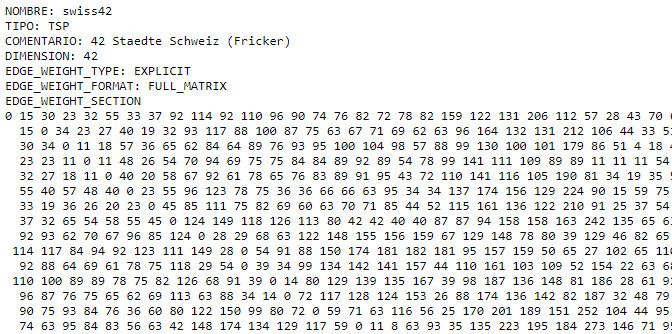

In [98]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [99]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 16, 15, 6, 39, 24, 31, 17, 29, 19, 14, 18, 13, 7, 35, 26, 1, 21, 32, 37, 40, 20, 3, 36, 34, 41, 22, 4, 23, 33, 8, 28, 9, 25, 10, 38, 27, 30, 11, 12, 2, 5]
4444


#BUSQUEDA ALEATORIA

In [100]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 5000)

Mejor solución: [0, 17, 31, 7, 34, 15, 37, 4, 26, 19, 10, 18, 27, 32, 25, 12, 20, 13, 8, 23, 24, 39, 22, 40, 9, 38, 35, 16, 6, 2, 29, 5, 1, 33, 30, 21, 14, 28, 3, 11, 41, 36]
Distancia     : 3800


#BUSQUEDA LOCAL

In [101]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))

print(solucion)
print(nueva_solucion)


Distancia Solucion Incial: 3800
Distancia Mejor Solucion Local: 3523
[0, 17, 31, 7, 34, 15, 37, 4, 26, 19, 10, 18, 27, 32, 25, 12, 20, 13, 8, 23, 24, 39, 22, 40, 9, 38, 35, 16, 6, 2, 29, 5, 1, 33, 30, 21, 14, 28, 3, 11, 41, 36]
[0, 17, 31, 7, 14, 15, 37, 4, 26, 19, 10, 18, 27, 32, 25, 12, 20, 13, 8, 23, 24, 39, 22, 40, 9, 38, 35, 16, 6, 2, 29, 5, 1, 33, 30, 21, 34, 28, 3, 11, 41, 36]


In [102]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(solucion, problem )

En la iteracion  28 , la mejor solución encontrada es: [0, 7, 31, 17, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 39, 21, 40, 24, 22, 29, 4, 6, 1, 3, 32, 20, 33, 34, 38, 30, 28, 2, 27, 35, 36]
Distancia     : 1607


# Entornos variables

Esta técnica consiste en escoger una lista de entornos, en este ejemplo van a ser la búsqueda de vecindad 2-opt, 3-opt y reinserción, e ir buscando mejores soluciones utilizando de manera ordenada los entornos. Dicho de otra manera, se busca la mejor solución del primer entorno, si no se mejora, se pasa al siguiente, si se mejora, se vuelve a empezar con el primer entorno y la nueva mejor solución. Este ciclo se repite hasta que se realiza un número de iteraciones del bucle sin mejorar la solución, indicando que hemos alcanzado un mínimo. Gracias a esta técnica es posible escapar de mínimos locales, diversificando mejor que otras técnicas. A continuación, se desarrolla esta técnica.

In [103]:
#Estructura de reinserción de nodos, se elige un nodo y se cambia su posición
def vecina_reins(solucion):
  mejor_sol = []
  mejor_distancia = 10e100
  for i in range(len(solucion)):
    for j in range(len(solucion)):
      if i!=j:
        vecina = solucion[:j+1] + [solucion[i]] + solucion[j+1:]
        if i<j:
          vecina.pop(i)
        else:
          vecina.pop(i+1)
        #print(vecina)


        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina <= mejor_distancia:
          mejor_distancia = distancia_vecina
          mejor_sol = vecina
  return mejor_sol

print("Distancia Solucion Incial:" , distancia_total(solucion, problem))

nueva_solucion = vecina_reins(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))

print(solucion)
print(nueva_solucion)

Distancia Solucion Incial: 3800
Distancia Mejor Solucion Local: 3527
[0, 17, 31, 7, 34, 15, 37, 4, 26, 19, 10, 18, 27, 32, 25, 12, 20, 13, 8, 23, 24, 39, 22, 40, 9, 38, 35, 16, 6, 2, 29, 5, 1, 33, 30, 21, 14, 28, 3, 11, 41, 36]
[0, 17, 31, 7, 34, 15, 37, 4, 26, 19, 10, 18, 27, 32, 25, 12, 13, 8, 23, 24, 39, 22, 40, 9, 38, 20, 35, 16, 6, 2, 29, 5, 1, 33, 30, 21, 14, 28, 3, 11, 41, 36]


In [104]:
#Estructura de vecindad 3-opt
def vecina_3opt(solucion):
    mejor_sol = []
    mejor_distancia = 10e100

    for i in range(1, len(solucion)-4):
        for j in range(i+1, len(solucion)-3):
            for k in range(j+1, len(solucion)-1):
                s1 = solucion[:i]
                s2 = solucion[i:j]
                s3 = solucion[j:k]
                s4 = solucion[k:]

                opciones = [
                    s1 + s2[::-1] + s3 + s4,
                    s1 + s2 + s3[::-1] + s4,
                    s1 + s3 + s2 + s4,
                    s1 + s3[::-1] + s2[::-1] + s4
                ]

                for vecina in opciones:
                    dist = distancia_total(vecina, problem)
                    if dist < mejor_distancia:
                        mejor_distancia = dist
                        mejor_sol = vecina
    return mejor_sol

print("Distancia Solucion Incial:" , distancia_total(solucion, problem))

nueva_solucion = vecina_3opt(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))

print(solucion)
print(nueva_solucion)

Distancia Solucion Incial: 3800
Distancia Mejor Solucion Local: 3489
[0, 17, 31, 7, 34, 15, 37, 4, 26, 19, 10, 18, 27, 32, 25, 12, 20, 13, 8, 23, 24, 39, 22, 40, 9, 38, 35, 16, 6, 2, 29, 5, 1, 33, 30, 21, 14, 28, 3, 11, 41, 36]
[0, 17, 31, 7, 34, 20, 13, 8, 23, 24, 39, 22, 40, 9, 38, 35, 16, 6, 2, 29, 5, 1, 33, 30, 21, 14, 15, 37, 4, 26, 19, 10, 18, 27, 32, 25, 12, 28, 3, 11, 41, 36]


In [105]:
def busqueda_local_entornos_variables(solucion, problem,entornos,max_iter):
  mejor_sol = solucion[:]
  mejor_dist = distancia_total(solucion, problem)

  iter_sin_mejora = 0

  while iter_sin_mejora < max_iter:
      # Recorrer todos los entornos
      for vecindad in entornos:
          S_nueva = vecindad(mejor_sol)
          dist_nueva = distancia_total(S_nueva, problem)

          if dist_nueva < mejor_dist:
              mejor_sol = S_nueva[:]
              mejor_dist = dist_nueva
              iter_sin_mejora = 0  # reset contador
              break  # volver al primer entorno
          else:
              iter_sin_mejora += 1
      else:
          # No hubo mejora en ningún entorno
          break

  print("Mejor distancia encontrada:", mejor_dist)
  print("Solución:", mejor_sol)
  return mejor_sol

In [106]:
entornos = [genera_vecina, vecina_reins, vecina_3opt]
solucion = busqueda_local_entornos_variables(solucion,problem,entornos,100)

Mejor distancia encontrada: 1273
Solución: [31, 17, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 8, 41, 23, 9, 21, 40, 24, 39, 22, 38, 30, 29, 28, 27, 2, 3, 4, 6, 1, 0, 32, 34, 33, 20, 35, 36]


Como se puede observar, se ha encontrado una solución mucho mejor que la encontrada con una búsqueda local simple.

#SIMULATED ANNEALING


In [107]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [108]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 1, 31, 36, 35, 20, 33, 34, 32, 3, 27, 23, 40, 24, 21, 39, 9, 8, 13, 19, 11, 25, 41, 22, 38, 30, 7, 17, 37, 16, 15, 14, 5, 26, 18, 6, 4, 2, 28, 29, 10, 12]
con una distancia total de 1949


In [109]:
def genera_vecina_mejorado(solucion):
  #Invierte el segmento entre i y j
  i, j = sorted(random.sample(range(1, len(solucion)), 2))
  # Solo invertimos el segmento entre i y j
  nueva = solucion[:i] + solucion[i:j+1][::-1] + solucion[j+1:]
  return nueva

In [110]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_mejorado(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 1, 3, 4, 12, 11, 25, 41, 23, 40, 24, 21, 9, 8, 10, 18, 5, 26, 13, 19, 14, 16, 15, 37, 31, 36, 35, 17, 7, 6, 2, 28, 33, 20, 34, 38, 39, 22, 30, 29, 27, 32]
con una distancia total de 1644


Como se observa en el código de arriba, con genera_vecina_mejorado, se ha mejorado la solución encontrada gracias a una implementación no tan aleatoria.

#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [111]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


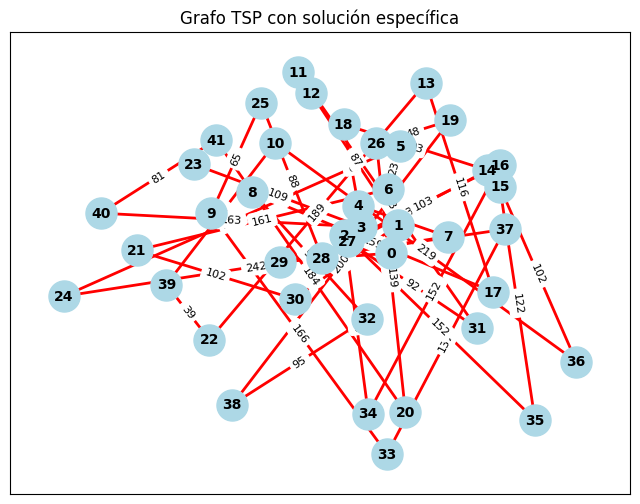

In [112]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

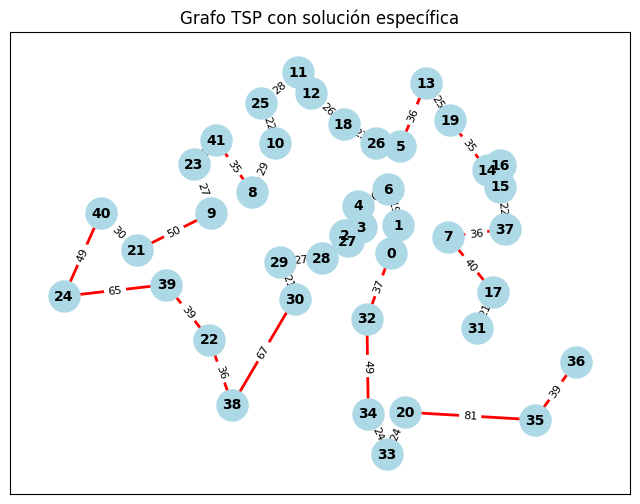

In [113]:
plot_tsp_solution(problem.edge_weights, solucion)